<a href="https://colab.research.google.com/github/IamJesseP/Frontend-EcoBots/blob/main/EcoBots_Recyclable_Detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before Starting

Before starting traning, we store directory path.

In [ ]:
import os

# store the current working directory path to variable HOME
HOME = os.getcwd()

# print out HOME
print(HOME)

/content


## Install YOLOv8

Here we install YOLOv8 model via git clone.

In [ ]:
# Git clone YOLOv8

# Change directory to HOME.
%cd {HOME}

# Command to clone YOLOv8.
!git clone https://github.com/ultralytics/ultralytics.git

# Change directory to the downloaded YOLOv8 folder.
%cd {HOME}/ultralytics

# Install the 'ultralytics' package in editable mode, which allows for development changes.
!pip install -e .

from IPython import display

# Clear the current output in the IPython environment.
display.clear_output()

import ultralytics

# Check current version against the required version or range.
ultralytics.checks()

Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.5/78.2 GB disk)


In [ ]:
# Import the 'YOLO' class from the 'ultralytics' module, and 'Image' and 'display' class from 'IPython.display'

from ultralytics import YOLO

from IPython.display import display, Image

## Download dataset

Here we download dataset from Roboflow.

In [ ]:
# Create and change directory 'datasets'.
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Code below is copied from Roboflow dataset to download dataset.

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="MTEmA8sOpVhVuBoLIvYH")
project = rf.workspace("trash-annotations").project("trash-detection-kcsnu")
dataset = project.version(7).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.150, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Trash-Detection-7 in yolov8:: 100%|██████████| 5060/5060 [00:01<00:00, 3519.79it/s]


## Train the Model
Now we can start training our YOLOv8 model with the dataset we downloaded.

In [ ]:
# Change directory back to HOME.
%cd {HOME}

# This code train the model and change parameters. We set image size to 640, epochs to 100, batch to 16.
!yolo task=detect mode=train model=yolov8s.pt imgsz=640 data=data.yaml epochs=100 batch=16 name=yolov8s_custom

/content/datasets/Trash-Detection-7
Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

## Training Results

Now the model is trained, the results is saved. To save the results locally, you click on the folder icon on the left in the notebook and download the ones you want. The 'best.pt' is in the 'weights' folder.

In [ ]:
# This command shows all the files in the saved result folder.
!ls {HOME}/runs/detect/train/

args.yaml					     train_batch1.jpg
confusion_matrix.png				     train_batch2.jpg
events.out.tfevents.1674045326.2b5c9f3b39fe.12420.0  train_batch585.jpg
F1_curve.png					     train_batch586.jpg
P_curve.png					     train_batch587.jpg
PR_curve.png					     val_batch0_labels.jpg
predictions.json				     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     weights
train_batch0.jpg


## Validate the Model

Val mode is used for validating a YOLOv8 model after it has been trained. In this mode, the model is evaluated on a validation set to measure its accuracy and generalization performance.

In [ ]:
# Evaluate the model on validation set.
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.9 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.25s/it]
                   all         38        905       0.81      0.726      0.762      0.493
                  ball         38         35      0.788      0.229      0.293     0.0589
            goalkeeper         38         27      0.799      0.963      0.953       0.66
                player         38        754      0.937      0.938      0.973      0.737
               referee         38         89      0.716      0.775      0.828      0.515
Speed: 2.1ms pre-process, 7.0ms inference, 0.0ms loss, 1.6ms post-process per image


## Predict with the Model

Finally, predict mode is used to make predictions using the model. Here we make predictions with the test data.

In [ ]:
# Perform predictions over test set. All the predictions are saved.
%cd {HOME}
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/yolov8s_custom6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.150 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients

image 1/350 /content/datasets/Trash-Detection-7/test/images/cardboard103_jpg.rf.8472e46d6fe2cd516cc6d15f1b9724c9.jpg: 640x640 1 cardboard, 16.3ms
image 2/350 /content/datasets/Trash-Detection-7/test/images/cardboard110_jpg.rf.b4c291c6d9c28563b062d579530183a9.jpg: 640x640 1 cardboard, 16.3ms
image 3/350 /content/datasets/Trash-Detection-7/test/images/cardboard112_jpg.rf.066c0c7268bfc117c4faf11be12a7864.jpg: 640x640 1 cardboard, 1 metal, 16.3ms
image 4/350 /content/datasets/Trash-Detection-7/test/images/cardboard122_jpg.rf.20baab2d0eae6eedb9070ab2761280d5.jpg: 640x640 1 cardboard, 16.3ms
image 5/350 /content/datasets/Trash-Detection-7/test/images/cardboard124_jpg.rf.208f3ef7237094ead8ccfc76e2733258.jpg: 640x640 1 cardboard, 16.2ms
image 6/350 /content/datasets/Trash-Detection-7/test/images/cardboard125_jpg.rf.dbd509ab2ba7d4a

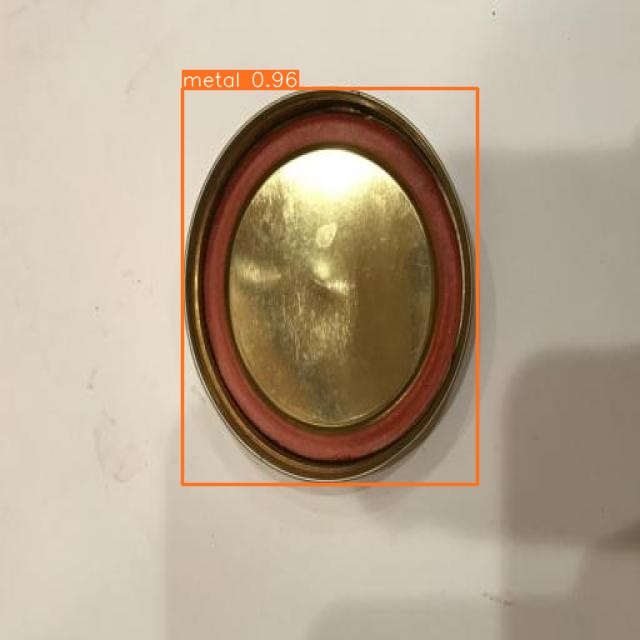

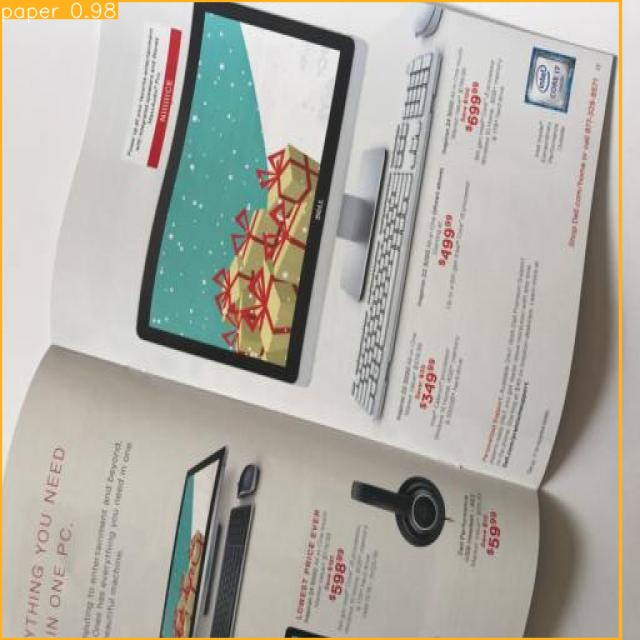

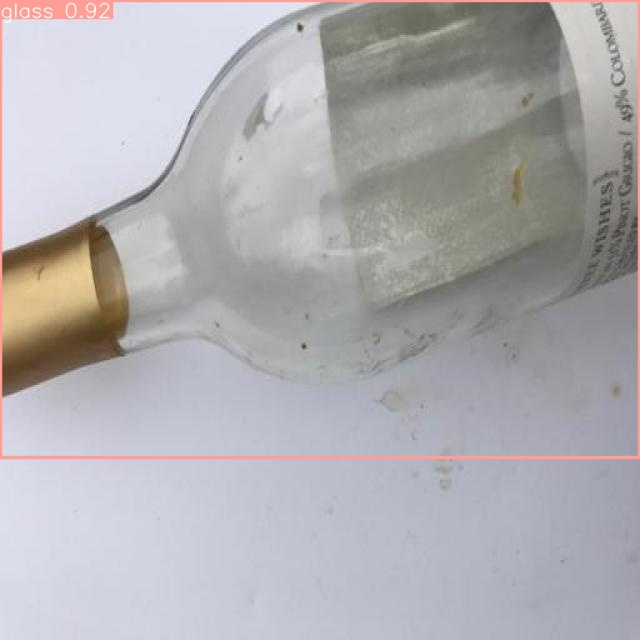

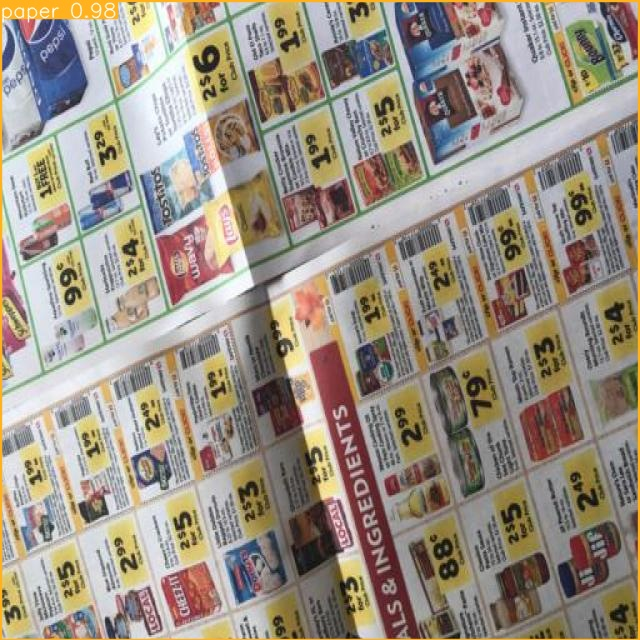

In [ ]:
# Here we display a few predictions.

import glob
from IPython.display import Image, display

# We display 4 images with a for loop.
for image_path in glob.glob(f'{HOME}/ultralytics/runs/detect/predict/*.jpg')[:4]:
      display(Image(filename=image_path, width=400))
      print("\n")

## The end of model training! Next step is to deploy the model using Huggingface Space.

https://huggingface.co/spaces/Haha777/Ecobots-predict-text